In [1]:
import cv2

In [2]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from kmeansclass import Kmeans

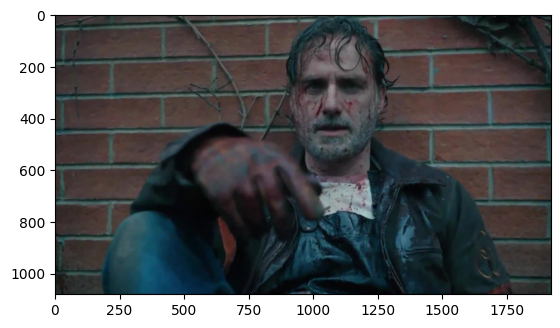

In [3]:
imagen_archivo = "rick.jpg"
imagen = cv2.imread(imagen_archivo)
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)
plt.show()

# Implementacion propia, no funciona muy bien D:

In [4]:
nreg,ncol,ncan = imagen.shape
print(nreg,ncol,ncan)
ximagen = np.reshape(imagen, (nreg*ncol,3))
print(ximagen.shape)

1080 1920 3
(2073600, 3)


In [5]:
kmeans = Kmeans(8)
print(ximagen.shape)
kmeans.fit(ximagen)
new_ximagen = np.zeros((nreg*ncol,3))
print(kmeans.labels.shape, kmeans.labels)
print(kmeans.centroids.shape, kmeans.centroids)
for i in range(nreg*ncol):
  new_ximagen[i] = np.intc(kmeans.centroids[kmeans.labels[i]])
new_ximagen = new_ximagen.astype('uint8')
#print(new_ximagen)


(2073600, 3)
(2073600,) [1 1 1 ... 4 4 4]
(8, 3) [[82 74 75]
 [40 47 50]
 [88 79 79]
 [81 93 99]
 [60 58 59]
 [78 83 90]
 [30 38 42]
 [74 69 69]]


## toma mucho tiempo, 1m 16.6s

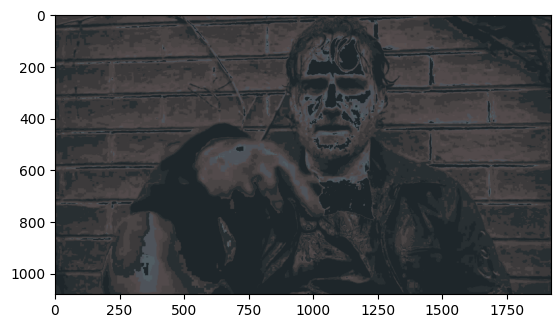

In [6]:
new_imagen = np.reshape(new_ximagen, (nreg,ncol,3))
plt.imshow(new_imagen)
plt.show()

# Implementacion sklearn

In [7]:
nreg,ncol,ncan = imagen.shape
print(nreg,ncol,ncan)
ximagen = np.reshape(imagen, (nreg*ncol,3))
print(ximagen.shape)

1080 1920 3
(2073600, 3)


In [8]:
k_means = KMeans(n_clusters=8)
model = k_means.fit(ximagen)
centroids = k_means.cluster_centers_
labels= k_means.labels_
print(centroids,labels)

[[ 54.62766001  50.80754021  50.63974383]
 [ 23.03672507  39.63413406  45.30581143]
 [ 76.70935445  61.5679529   59.32286703]
 [ 36.83539658  74.2200523   85.69852744]
 [ 10.25065356  16.71140778  19.91335638]
 [ 85.38434917  75.04632988  74.99010165]
 [144.61631381 154.39939389 158.80604405]
 [ 90.81852145 100.64438537 102.47101803]] [1 1 1 ... 1 1 1]


In [9]:
new_ximagen = np.zeros((nreg*ncol,3))
for i in range(nreg*ncol):
  new_ximagen[i] = np.intc(centroids[labels[i]])
new_ximagen = new_ximagen.astype('uint8')

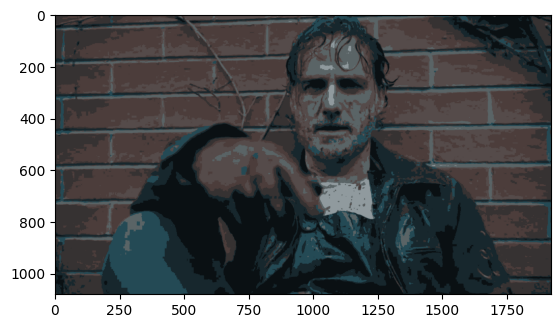

In [10]:
new_imagen = np.reshape(new_ximagen, (nreg,ncol,3))
plt.imshow(new_imagen)
plt.show()